# Social Media Mining
## Final Project

In [1]:
# Author Pramod Duvvuri
import pandas as pd

In [2]:
ht = pd.read_csv('C:/Users/admin/Downloads/SMM-master/HillaryClinton.csv')
ht.head()

,author,date,time,favorites,hashtags,mentions,permalink,replies,retweets,term,text,tweet_id,username
0,1339835893,01-10-2015,18:04:00,5577,NaN,NaN,https://twitter.com/HillaryClinton/status/6497...,851,3122,HillaryClinton,Another devastating shooting. We need sensible...,_649706544704167936,HillaryClinton
1,1339835893,01-10-2015,12:34:00,948,NaN,NaN,https://twitter.com/HillaryClinton/status/6496...,232,554,HillaryClinton,Raising the minimum wage isn’t just a women’s ...,_649623498210447360,HillaryClinton
2,1339835893,01-10-2015,09:15:00,1264,NaN,NaN,https://twitter.com/HillaryClinton/status/6495...,183,718,HillaryClinton,The United States is the only country in the d...,_649573475645005827,HillaryClinton
3,1339835893,30-09-2015,20:36:00,1286,NaN,NaN,https://twitter.com/HillaryClinton/status/6493...,185,481,HillaryClinton,"In case you were wondering, you should be foll...",_649382296366264321,HillaryClinton
4,1339835893,02-10-2015,17:15:00,1384,NaN,NaN,https://twitter.com/HillaryClinton/status/6500...,229,498,HillaryClinton,"""I am well aware that this is a political moun...",_650056562594172928,HillaryClinton


In [3]:
dt = pd.read_csv('C:/Users/admin/Downloads/SMM-master/realDonaldTrump.csv')
dt.head()

,author,date,time,favorites,hashtags,mentions,permalink,replies,retweets,term,text,tweet_id,username
0,25073877,01-04-2015,16:13:00,318,NaN,NaN,https://twitter.com/realDonaldTrump/status/583...,30,268,realDonaldTrump,Entrepreneurs: Practice positive thinking with...,_583361671156113409,realDonaldTrump
1,25073877,01-04-2015,16:03:00,332,NaN,NaN,https://twitter.com/realDonaldTrump/status/583...,28,258,realDonaldTrump,Entrepreneurs: Learn to trust yourself. Being ...,_583359130141913088,realDonaldTrump
2,25073877,01-04-2015,16:00:00,392,NaN,NaN,https://twitter.com/realDonaldTrump/status/583...,31,322,realDonaldTrump,Entrepreneurs: Realize that success requires 1...,_583358317323501569,realDonaldTrump
3,25073877,01-04-2015,15:55:00,97,NaN,@ @,https://twitter.com/realDonaldTrump/status/583...,15,89,realDonaldTrump,Must read via @ FoxNews by @ JaySekulow: “Mr. ...,_583356914014257153,realDonaldTrump
4,25073877,01-04-2015,15:38:00,159,NaN,NaN,https://twitter.com/realDonaldTrump/status/583...,45,110,realDonaldTrump,Obama’s offer to Iran will not stop Iran’s bre...,_583352700164771841,realDonaldTrump


In [4]:
import textblob as tb
a = tb.TextBlob(dt.text[4])

In [5]:
print(dt.text[4])
print(a.sentiment)

Obama’s offer to Iran will not stop Iran’s breakout capability. It is a bad, desperate deal negotiated from weakness. Pass sanctions!
Sentiment(polarity=-0.7249999999999999, subjectivity=0.8333333333333333)


In [6]:
print(a.sentiment_assessments)

Sentiment(polarity=-0.7249999999999999, subjectivity=0.8333333333333333, assessments=[(['bad'], -0.6999999999999998, 0.6666666666666666, None), (['desperate', '!'], -0.75, 1.0, None)])


In [7]:
def get_sentiment_analysis(tweet):
        # create TextBlob object of passed tweet text
        analysis = tb.TextBlob(clean_tweet(str(tweet)))
        sentiment = ''
        # set sentiment
        if analysis.sentiment.polarity > 0:
            sentiment = 'positive'
        elif analysis.sentiment.polarity == 0:
            sentiment = 'neutral'
        else:
            sentiment = 'negative'            
        return sentiment

In [8]:
def get_sentiment_details(tweet):
        # create TextBlob object of passed tweet text
        analysis = tb.TextBlob(clean_tweet(tweet))
        return analysis.sentiment

In [9]:
import re
def clean_tweet(tweet):
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

In [10]:
print(dt.text[3])

Must read via @ FoxNews by @ JaySekulow: “Mr. President: Will you bring home American pastor imprisoned in Iran?”http://www.foxnews.com/opinion/2015/03/30/mr-president-will-bring-home-american-pastor-imprisoned-in-iran/ …


In [11]:
print(clean_tweet(dt.text[3]))

Must read via FoxNews by JaySekulow Mr President Will you bring home American pastor imprisoned in Iran


In [12]:
dt_final = pd.DataFrame(columns = ['tweet','sentiment','polarity','subjectivity','label'])
hc_final = pd.DataFrame(columns = ['tweet','sentiment','polarity','subjectivity','label'])

In [13]:
dt_final.tweet = dt.text
dt_final.label = 'Donald_Trump'
# --------------------------------
hc_final.tweet = ht.text
hc_final.label = 'Hillary_Clinton'

In [14]:
dt_final.sentiment = dt_final.tweet.apply(get_sentiment_analysis)
dt_final['sentiment_details'] = dt_final.tweet.apply(get_sentiment_details)
dt_final[['polarity','subjectivity']] = dt_final['sentiment_details'].apply(pd.Series) #Splitting Tuple

In [15]:
dt_final.head()

,tweet,sentiment,polarity,subjectivity,label,sentiment_details
0,Entrepreneurs: Practice positive thinking with...,positive,0.088636,0.272727,Donald_Trump,"(0.08863636363636362, 0.2727272727272727)"
1,Entrepreneurs: Learn to trust yourself. Being ...,neutral,0.000000,0.000000,Donald_Trump,"(0.0, 0.0)"
2,Entrepreneurs: Realize that success requires 1...,positive,0.066667,0.033333,Donald_Trump,"(0.06666666666666667, 0.03333333333333333)"
3,Must read via @ FoxNews by @ JaySekulow: “Mr. ...,neutral,0.000000,0.000000,Donald_Trump,"(0.0, 0.0)"
4,Obama’s offer to Iran will not stop Iran’s bre...,negative,-0.650000,0.833333,Donald_Trump,"(-0.6499999999999999, 0.8333333333333333)"


In [16]:
hc_final['tweet'] = hc_final['tweet'].apply(str)
hc_final.sentiment = hc_final['tweet'].apply(get_sentiment_analysis)
hc_final['sentiment_details'] = hc_final['tweet'].apply(get_sentiment_details)
hc_final[['polarity','subjectivity']] = hc_final['sentiment_details'].apply(pd.Series) #Splitting Tuple

In [17]:
hc_final.head()

,tweet,sentiment,polarity,subjectivity,label,sentiment_details
0,Another devastating shooting. We need sensible...,negative,-1.000,1.000,Hillary_Clinton,"(-1.0, 1.0)"
1,Raising the minimum wage isn’t just a women’s ...,positive,0.200,0.200,Hillary_Clinton,"(0.2, 0.2)"
2,The United States is the only country in the d...,positive,0.050,0.650,Hillary_Clinton,"(0.05, 0.65)"
3,"In case you were wondering, you should be foll...",neutral,0.000,0.100,Hillary_Clinton,"(0.0, 0.1)"
4,"""I am well aware that this is a political moun...",positive,0.125,0.175,Hillary_Clinton,"(0.125, 0.175)"


In [18]:
dt_final.groupby('sentiment').count()

,tweet,polarity,subjectivity,label,sentiment_details
sentiment,,,,,
negative,1715,1715,1715,1715,1715
neutral,2761,2761,2761,2761,2761
positive,4885,4885,4885,4885,4885


In [19]:
dt_final['tweet'].count()

9361

In [20]:
dt_final.groupby('sentiment').count() * 100 / dt_final['tweet'].count()

,tweet,polarity,subjectivity,label,sentiment_details
sentiment,,,,,
negative,18.320692,18.320692,18.320692,18.320692,18.320692
neutral,29.494712,29.494712,29.494712,29.494712,29.494712
positive,52.184596,52.184596,52.184596,52.184596,52.184596


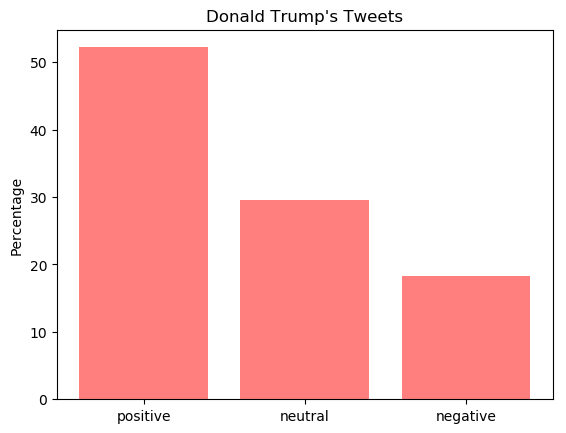

In [28]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
import numpy as np

sentiment = [52.2,29.5,18.3]
objects = ('positive','neutral','negative')
y_pos = np.arange(len(objects))
 
plt.bar(y_pos, sentiment, align='center', alpha=0.5,color = 'r')
plt.xticks(y_pos, objects)
plt.ylabel('Percentage')
plt.title('Donald Trump\'s Tweets')
 
plt.show()

In [29]:
hc_final.groupby('sentiment').count()

,tweet,polarity,subjectivity,label,sentiment_details
sentiment,,,,,
negative,1087,1087,1087,1087,1087
neutral,2919,2919,2919,2919,2919
positive,3451,3451,3451,3451,3451


In [30]:
hc_final['tweet'].count()

7457

In [31]:
hc_final.groupby('sentiment').count() * 100 / hc_final['tweet'].count()

,tweet,polarity,subjectivity,label,sentiment_details
sentiment,,,,,
negative,14.576908,14.576908,14.576908,14.576908,14.576908
neutral,39.144428,39.144428,39.144428,39.144428,39.144428
positive,46.278664,46.278664,46.278664,46.278664,46.278664


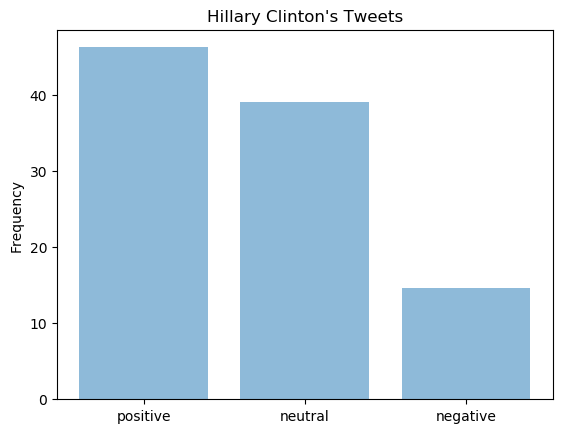

In [32]:
sentiment = [46.3,39.1,14.6]
objects = ('positive','neutral','negative')
y_pos = np.arange(len(objects))
 
plt.bar(y_pos, sentiment, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Frequency')
plt.title('Hillary Clinton\'s Tweets')
plt.color = 'r'
 
plt.show()

In [33]:
tweets = []
tweets = dt_final.tweet
data = tweets.apply(clean_tweet) #Cleaning Tweets

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_df=0.8, min_df=100, stop_words='english')

In [35]:
X = cv.fit_transform(data)
feature_names = cv.get_feature_names()
print("{} documents, {} word featuers.".format(X.shape[0], X.shape[1]))

9361 documents, 119 word featuers.


In [36]:
from sklearn.decomposition import LatentDirichletAllocation
import time

no_topics = 10

print("Training LDA:")
st = time.time()
lda = LatentDirichletAllocation(
    n_components=no_topics, 
    max_iter=5, 
    learning_method='online', 
    learning_offset=50, 
    random_state=0,
    n_jobs=4)
lda.fit(X)
print("Finished.")
print("{} seconds.".format(time.time() - st))

Training LDA:
Finished.
17.718013525009155 seconds.


In [37]:
lda.components_.shape

(10, 119)

In [38]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words-1:-1]]))

In [39]:
display_topics(lda, feature_names, 10)

Topic 0:
twitter com thank pic just trump2016 love did nice trump2016pic
Topic 1:
crooked going join obama tomorrow iowa got total deal state
Topic 2:
big win want great thanks people crowd realdonaldtrump carolina best
Topic 3:
tonight bad today good watch enjoy american great morning 000
Topic 4:
hillary clinton like cnn vote debate jobs people campaign realdonaldtrump
Topic 5:
great america make new poll cruz said media let ted
Topic 6:
realdonaldtrump country president run need really support world totally just
Topic 7:
trump realdonaldtrump donald trump2016 job jeb polls president mr bush
Topic 8:
foxnews don realdonaldtrump amazing won way speech doing florida megynkelly
Topic 9:
makeamericagreatagain time night look right years live believe national foxnews


In [40]:
data[19]

'Millard16 I m loving everything DonaldTrump has been saying about the Iranian Nuclear deal China Mexico and the border Please run'

In [41]:
d1 = X[19, :]
d1_topics = lda.transform(d1)
d1_topics

array([[0.025     , 0.27499989, 0.025     , 0.025     , 0.025     ,
        0.025     , 0.27500003, 0.02500008, 0.275     , 0.025     ]])

In [42]:
np.argsort(d1_topics)[0][::-1]

array([6, 8, 1, 7, 4, 3, 9, 2, 5, 0], dtype=int64)

In [43]:
data_lda = pd.read_csv('C:/Users/admin/Downloads/SMM-master/tweets_LDA.csv')
data_lda.tail()

,text,label
735,Congratulations to @ TrumpNewYork and @TrumpTo...,Real Estate
736,"With our brand new Tennis Performance Center, ...",Golf
737,Congrats to great golfer @ Frostpga on his big...,Golf
738,A beautiful article by @ IvankaTrump on my new...,Golf
739,See the amazing views from @ TrumpGolfLA locat...,Golf


In [44]:
data_lda.groupby('label').count()

,text
label,
Advice,12
Campaign,333
Democrats,38
Fake News,82
Fox News,31
Golf,8
Hillary,154
Investigation,10
Obama,35


In [45]:
data_lda['label'].unique()

array(['Advice', 'Fox News', 'Obama', 'Campaign', 'Democrats', 'Golf',
       'Hillary', 'Real Estate', 'Fake News', 'Trump Attack',
       'Investigation'], dtype=object)

In [46]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

X = data_lda['text']
y = data_lda['label']

vec = CountVectorizer()
vec.fit(X)
train_matrix = vec.transform(X)
train_df = pd.DataFrame(train_matrix.toarray(), columns=vec.get_feature_names())

In [47]:
print(train_df.shape)

(740, 3003)


In [48]:
X_train, X_test, y_train, y_test = train_test_split(train_df, y, test_size=0.2, random_state=2)

In [49]:
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8581081081081081

In [51]:
from  sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB();
mnb.fit(X_train,y_train);

In [52]:
y_pred = mnb.predict(X_test)
#Checking for the Accuracy
accuracy_score(y_test,y_pred)

0.777027027027027

In [53]:
from sklearn.model_selection import cross_val_score
cv_scores_mnb = cross_val_score(mnb, train_df, y, cv=5, scoring="accuracy")
print(cv_scores_mnb)

[0.66447368 0.72847682 0.68456376 0.69655172 0.62237762]


In [54]:
print(cv_scores_mnb.mean())

0.679288722061479


In [55]:
cv_scores = cross_val_score(clf, train_df, y, cv=5, scoring="accuracy")
print(cv_scores)

[0.75       0.77483444 0.74496644 0.79310345 0.65034965]


In [56]:
print(cv_scores.mean())

0.742650795732925


In [57]:
#Without Stop words
vec = CountVectorizer(stop_words='english')
vec.fit(X)
train_matrix = vec.transform(X)
train_df = pd.DataFrame(train_matrix.toarray(), columns=vec.get_feature_names())

X_train, X_test, y_train, y_test = train_test_split(train_df, y, test_size = 0.20,random_state = 2)

mnb.fit(X_train,y_train);
y_pred = mnb.predict(X_test)

#Checking for the Accuracy
accuracy_score(y_test,y_pred)

0.7972972972972973

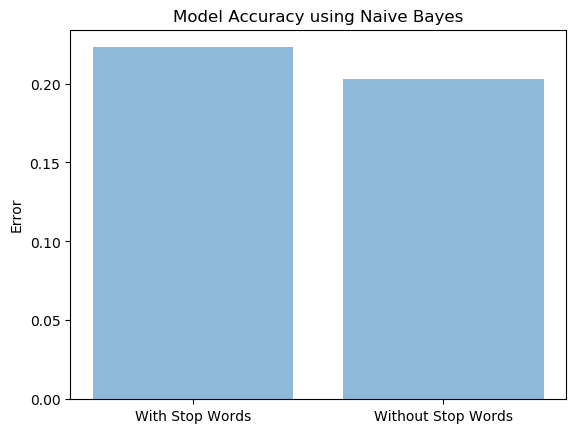

In [58]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
 
objects = ('With Stop Words', 'Without Stop Words')
y_pos = np.arange(len(objects))
performance = [1 - 0.777027027027027,1 - 0.7972972972972973]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Error')
plt.title('Model Accuracy using Naive Bayes')
 
plt.show()

In [59]:
#Without Stop Words
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8648648648648649

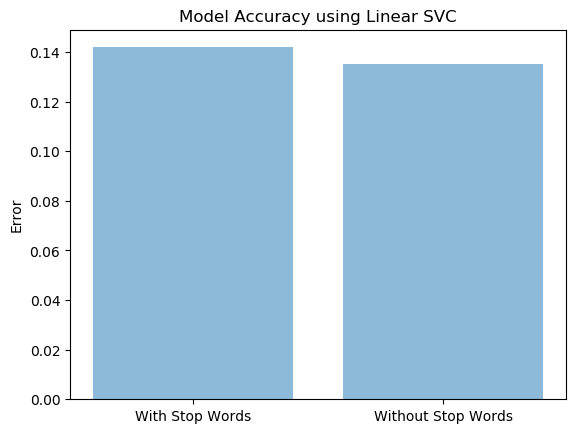

In [60]:
objects = ('With Stop Words', 'Without Stop Words')
y_pos = np.arange(len(objects))
performance = [1 - 0.8581081081081081,1 - 0.8648648648648649]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Error')
plt.title('Model Accuracy using Linear SVC')
 
plt.show()

In [61]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline

In [62]:
# Define a pipeline combining a text feature extractor with a simple classifier
pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer(norm='l2',smooth_idf=True,use_idf=True)),
    ('clf', SGDClassifier(penalty='l2',max_iter=100, tol=None)) ]);
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 2)
pipeline.fit(X_train,y_train);
y_pred = pipeline.predict(X_test);
accuracy_score(y_test,y_pred)

0.8648648648648649

In [63]:
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring="accuracy")
cv_scores

array([0.75      , 0.75496689, 0.79865772, 0.80689655, 0.67132867])

In [64]:
cv_scores.mean()

0.7563699657181666

In [65]:
cv_scores = cross_val_score(pipeline, X, y, cv=7, scoring="accuracy")

In [66]:
cv_scores

array([0.72072072, 0.76851852, 0.78703704, 0.81904762, 0.75961538,
       0.76470588, 0.65686275])

In [67]:
cv_scores.mean()

0.7537868439128943

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB

In [69]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier(n_estimators=300)
svm_clf = SVC()
mnb_clf = MultinomialNB()
svm_gd_clf = SGDClassifier(penalty='elasticnet',max_iter=100, tol=None)

In [70]:
voting_clf_1  = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [71]:
voting_clf_2 = VotingClassifier(
    estimators=[('mnb', mnb_clf),('svc_gd', svm_gd_clf)],
    voting='hard')

In [72]:
voting_clf_3 = VotingClassifier(
    estimators=[('mnb', mnb_clf),('svc_gd', svm_gd_clf),('lr', log_clf)],
    voting='hard')

In [73]:
#Voting Classifier 1
X_train, X_test, y_train, y_test = train_test_split(train_matrix, y, test_size = 0.2,random_state = 2)
for clf in (log_clf, rnd_clf, svm_clf,voting_clf_1):
     clf.fit(X_train, y_train)
     y_pred = ''
     y_pred = clf.predict(X_test)
     print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8243243243243243
RandomForestClassifier 0.831081081081081
SVC 0.49324324324324326
VotingClassifier 0.8175675675675675


c:\users\admin\appdata\local\programs\python\python35\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [74]:
#Voting Classifier 2
X_train, X_test, y_train, y_test = train_test_split(train_matrix, y, test_size = 0.2,random_state = 2)
for clf in (mnb,svm_gd_clf,voting_clf_2):
     clf.fit(X_train, y_train)
     y_pred = ''
     y_pred = clf.predict(X_test)
     print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

MultinomialNB 0.7972972972972973
SGDClassifier 0.8918918918918919
VotingClassifier 0.7972972972972973


c:\users\admin\appdata\local\programs\python\python35\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [75]:
#Voting Classifier 3
X_train, X_test, y_train, y_test = train_test_split(train_matrix, y, test_size = 0.2,random_state = 2)
for clf in (log_clf, svm_gd_clf, mnb_clf,voting_clf_3):
     clf.fit(X_train, y_train)
     y_pred = ''
     y_pred = clf.predict(X_test)
     print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8243243243243243
SGDClassifier 0.8783783783783784
MultinomialNB 0.7972972972972973
VotingClassifier 0.8513513513513513


c:\users\admin\appdata\local\programs\python\python35\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [76]:
X_train, X_test, y_train, y_test = train_test_split(train_matrix, y, test_size = 0.2,random_state = 2)
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
#Accuracy Score
accuracy_score(y_test,y_pred)

0.6959459459459459

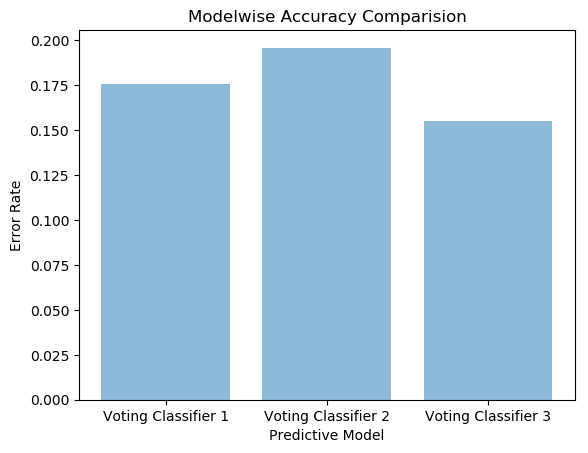

In [77]:
objects = ('Voting Classifier 1', 'Voting Classifier 2', 'Voting Classifier 3')
y_pos = np.arange(len(objects))
performance = [1 - 0.8243243243243243,1 - 0.8040540540540541,1 - 0.8445945945945946]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Error Rate')
plt.title('Modelwise Accuracy Comparision')
plt.xlabel('Predictive Model')
 
plt.show()